In [1]:
import random
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from support.utilities import *
from support.language_models import *
from support.norms import *
from cipher.caesar import *

In [2]:
trials = 100000

In [15]:
corpus = sanitise(cat([
    open('support/shakespeare.txt').read(), 
    open('support/sherlock-holmes.txt').read(), 
    open('support/war-and-peace.txt').read()
    ]))
corpus_length = len(corpus)

In [8]:
def random_ciphertext(message_length):
    sample_start = random.randint(0, corpus_length - message_length)
    sample = corpus[sample_start:(sample_start + message_length)]
    key = random.randint(1, 25)
    ciphertext = caesar_encipher(sample, key)
    return key, ciphertext

In [25]:
k, c = random_ciphertext(20)
k, c, caesar_decipher(c, k)

(16, 'qhusedludjyedqbjxydw', 'areconventionalthing')

In [4]:
l2_scaled_english_counts = l2_scale(english_counts)

In [5]:
metrics = [{'func': l1, 'invert': True, 'name': 'l1'}, 
    {'func': l2, 'invert': True, 'name': 'l2'},
    {'func': l3, 'invert': True, 'name': 'l3'},
    {'func': cosine_similarity, 'invert': False, 'name': 'cosine_similarity'}]
    # {'func': harmonic_mean, 'invert': True, 'name': 'harmonic_mean'},
    # {'func': geometric_mean, 'invert': True, 'name': 'geometric_mean'}]
scalings = [{'corpus_frequency': normalised_english_counts, 
         'scaling': l1_scale,
         'name': 'l1_scaled'},
        {'corpus_frequency': l2_scaled_english_counts, 
         'scaling': l2_scale,
         'name': 'l2_scaled'}]
message_lengths = [100, 50, 30, 20, 10, 5]

In [6]:
def make_frequency_compare_function(
        target_frequency, frequency_scaling, metric, invert):
    def frequency_compare(text):
        counts = frequency_scaling(frequencies(text))
        if invert:
            score = -1 * metric(target_frequency, counts)
        else:
            score = metric(target_frequency, counts)
        return score
    return frequency_compare

In [7]:
models = (
    [ {'func': make_frequency_compare_function(
            s['corpus_frequency'], s['scaling'], 
            m['func'], m['invert']),
       'name': '{} + {}'.format(m['name'], s['name'])}
        for m in metrics
        for s in scalings ] 
    + 
    [{'func': Pletters, 'name': 'Pletters'}, 
     {'func': Pbigrams, 'name': 'Pbigrams'},
     {'func': Ptrigrams, 'name': 'Ptrigrams'}]
)

In [9]:
# def eval_models():
#     [eval_one_model(m, l) 
#         for m in models
#         for l in message_lengths]

In [10]:
def eval_models():
    return {m['name']: {l: eval_one_model(m, l) for l in message_lengths}
               for m in models}

In [11]:
# def eval_one_model(model, message_length):
#     print(model['name'], message_length)
#     if model['name'] not in scores:
#         scores[model['name']] = collections.defaultdict(int)
#     for _ in range(trials):
#         key, ciphertext = random_ciphertext(message_length)
#         found_key, _ = caesar_break(ciphertext, model['func'])
#         if found_key == key:
#             scores[model['name']][message_length] += 1 
#     return scores[model['name']][message_length]

In [12]:
def eval_one_model(model, message_length):
    print(model['name'], message_length)
    successes = 0
    for _ in range(trials):
        key, ciphertext = random_ciphertext(message_length)
        found_key, _ = caesar_break(ciphertext, model['func'])
        if found_key == key:
            successes += 1 
    return successes

In [32]:
def write_results(scores):
    with open('caesar_break_parameter_trials.csv', 'w') as f:
        writer = csv.DictWriter(f, ['name'] + message_lengths, 
            quoting=csv.QUOTE_NONNUMERIC)
        writer.writeheader()
        for scoring in sorted(scores):
            scores[scoring]['name'] = scoring
            writer.writerow(scores[scoring])

In [26]:
scores = eval_models()
scores

l1 + l1_scaled 100
l1 + l1_scaled 50
l1 + l1_scaled 30
l1 + l1_scaled 20
l1 + l1_scaled 10
l1 + l1_scaled 5
l1 + l2_scaled 100
l1 + l2_scaled 50
l1 + l2_scaled 30
l1 + l2_scaled 20
l1 + l2_scaled 10
l1 + l2_scaled 5
l2 + l1_scaled 100
l2 + l1_scaled 50
l2 + l1_scaled 30
l2 + l1_scaled 20
l2 + l1_scaled 10
l2 + l1_scaled 5
l2 + l2_scaled 100
l2 + l2_scaled 50
l2 + l2_scaled 30
l2 + l2_scaled 20
l2 + l2_scaled 10
l2 + l2_scaled 5
l3 + l1_scaled 100
l3 + l1_scaled 50
l3 + l1_scaled 30
l3 + l1_scaled 20
l3 + l1_scaled 10
l3 + l1_scaled 5
l3 + l2_scaled 100
l3 + l2_scaled 50
l3 + l2_scaled 30
l3 + l2_scaled 20
l3 + l2_scaled 10
l3 + l2_scaled 5
cosine_similarity + l1_scaled 100
cosine_similarity + l1_scaled 50
cosine_similarity + l1_scaled 30
cosine_similarity + l1_scaled 20
cosine_similarity + l1_scaled 10
cosine_similarity + l1_scaled 5
cosine_similarity + l2_scaled 100
cosine_similarity + l2_scaled 50
cosine_similarity + l2_scaled 30
cosine_similarity + l2_scaled 20
cosine_similarity + l

{'Pbigrams': {5: 67277,
  10: 95323,
  20: 99831,
  30: 99962,
  50: 99972,
  100: 99975},
 'Pletters': {5: 47758,
  10: 81597,
  20: 97936,
  30: 99683,
  50: 99937,
  100: 99952},
 'Ptrigrams': {5: 74922,
  10: 97994,
  20: 99944,
  30: 99990,
  50: 99994,
  100: 99991},
 'cosine_similarity + l1_scaled': {5: 43193,
  10: 71183,
  20: 93346,
  30: 98358,
  50: 99764,
  100: 99948},
 'cosine_similarity + l2_scaled': {5: 43259,
  10: 71353,
  20: 93399,
  30: 98345,
  50: 99768,
  100: 99946},
 'l1 + l1_scaled': {5: 42940,
  10: 72617,
  20: 95454,
  30: 98944,
  50: 99879,
  100: 99949},
 'l1 + l2_scaled': {5: 44413,
  10: 74966,
  20: 95350,
  30: 98996,
  50: 99889,
  100: 99945},
 'l2 + l1_scaled': {5: 43350,
  10: 71287,
  20: 93457,
  30: 98336,
  50: 99822,
  100: 99946},
 'l2 + l2_scaled': {5: 43288,
  10: 71413,
  20: 93471,
  30: 98274,
  50: 99796,
  100: 99957},
 'l3 + l1_scaled': {5: 40661,
  10: 59770,
  20: 87384,
  30: 95766,
  50: 99324,
  100: 99942},
 'l3 + l2_scaled'

In [34]:
write_results(scores)

In [35]:
results = pd.read_csv('caesar_break_parameter_trials.csv').set_index('name')
results

,100,50,30,20,10,5
name,,,,,,
Pbigrams,99975,99972,99962,99831,95323,67277
Pletters,99952,99937,99683,97936,81597,47758
Ptrigrams,99991,99994,99990,99944,97994,74922
cosine_similarity + l1_scaled,99948,99764,98358,93346,71183,43193
cosine_similarity + l2_scaled,99946,99768,98345,93399,71353,43259
l1 + l1_scaled,99949,99879,98944,95454,72617,42940
l1 + l2_scaled,99945,99889,98996,95350,74966,44413
l2 + l1_scaled,99946,99822,98336,93457,71287,43350
l2 + l2_scaled,99957,99796,98274,93471,71413,43288


In [36]:
results.sort_values('5')

,100,50,30,20,10,5
name,,,,,,
l3 + l2_scaled,99922,99445,96568,89109,63241,39819
l3 + l1_scaled,99942,99324,95766,87384,59770,40661
l1 + l1_scaled,99949,99879,98944,95454,72617,42940
cosine_similarity + l1_scaled,99948,99764,98358,93346,71183,43193
cosine_similarity + l2_scaled,99946,99768,98345,93399,71353,43259
l2 + l2_scaled,99957,99796,98274,93471,71413,43288
l2 + l1_scaled,99946,99822,98336,93457,71287,43350
l1 + l2_scaled,99945,99889,98996,95350,74966,44413
Pletters,99952,99937,99683,97936,81597,47758


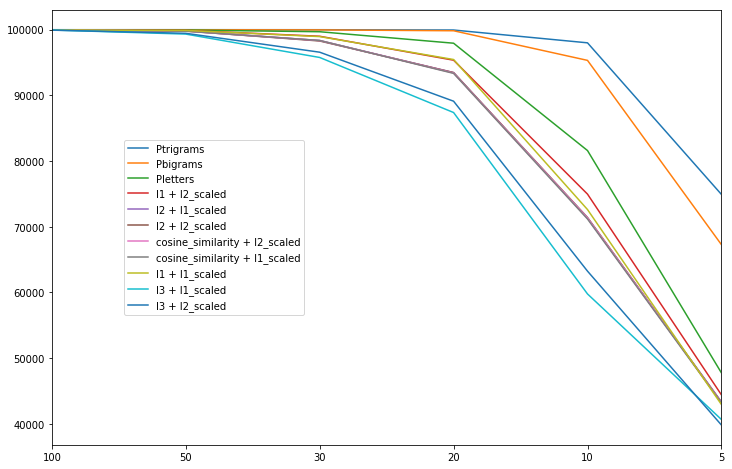

In [42]:
ax = results.sort_values('5', ascending=False).T.plot(figsize=(12, 8))
ax.legend(loc='center left', bbox_to_anchor=(0.1, 0.5))

# ubtg[['unigrams', 'bigrams', 'trigrams']].plot(figsize=(8, 6), ylim=(0, 1.1))
plt.savefig('blog-images/caesar_break_parameter_trials.png')

In [38]:
results / results.max().max()

,100,50,30,20,10,5
name,,,,,,
Pbigrams,0.99981,0.99978,0.999680,0.998370,0.953287,0.672810
Pletters,0.99958,0.99943,0.996890,0.979419,0.816019,0.477609
Ptrigrams,0.99997,1.00000,0.999960,0.999500,0.979999,0.749265
cosine_similarity + l1_scaled,0.99954,0.99770,0.983639,0.933516,0.711873,0.431956
cosine_similarity + l2_scaled,0.99952,0.99774,0.983509,0.934046,0.713573,0.432616
l1 + l1_scaled,0.99955,0.99885,0.989499,0.954597,0.726214,0.429426
l1 + l2_scaled,0.99951,0.99895,0.990019,0.953557,0.749705,0.444157
l2 + l1_scaled,0.99952,0.99828,0.983419,0.934626,0.712913,0.433526
l2 + l2_scaled,0.99963,0.99802,0.982799,0.934766,0.714173,0.432906
